In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib notebook

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

## EBIC 

In [3]:
q = 1.6E-19 #C
Ib = 1E-3
Eb = 2
eta = 1
Ei = 0.01

G0 = Ib*Eb*eta/q/Ei

In [4]:
def Ic(Eb, tm, W, L):
    """Returns Collection efficiency value for given:
    
    Eb – electron beam energy
    tm – metal thickness
    W  – screen charge region thickness
    L  – Diffusion length 
    
    """
    from scipy.integrate import quad
    
    def A(z, Eb):
        R = 7.34*Eb**(1.75)#nm, Eb in keV
        return np.piecewise(z, 
                            [z < 0.22*R, z >= 0.22*R],
                            [lambda z: 12.86, lambda z: 3.97])

    def h(z, Eb):
        R = 7.34*Eb**(1.75)#nm, Eb in keV
        return 1.603/R*np.exp(-A(z, Eb)*(z/R - 0.22)**2)
    
    def hexp(z, Eb):
        R = 7.34*Eb**(1.75)#nm, Eb in keV
        return 1.603/R*np.exp(-A(z, Eb)*(z/R - 0.22)**2)*np.exp(-(z-W)/L)

    
    I1 = np.asarray([quad(h,    tm,      W, args=(_Eb))[0] for _Eb in Eb])
    I2 = np.asarray([quad(hexp, tm, np.inf, args=(_Eb))[0] for _Eb in Eb])
    I = q*G0*(I1 + I2)
    I = I/max(I)
    return I

## Plot data

## Fit data

In [5]:
from scipy.optimize import curve_fit


def fit_data(path, tm, W):
    """Returns coefftitients for fitted data
    
    path – path to data file
    tm – value of metal thickness for initial guess
    W – value of scr for initial guess
    
    """
    
    csv = np.loadtxt(path, delimiter = ',')
    
    E = csv[:,0]
    I = csv[:,1]/max(csv[:,1]) ## normalized
    
    X = 7.34*E**(1.75) ##nm, E in keV
    
    guess = [tm, W, 51]
    bounds = ([1.0, 500.0, 50.0], [250.0, 5.0E4, 650])
    
    parameter_optimal, cov = curve_fit(Ic, E, I, p0 = guess, bounds = bounds) 
    print('optimal = ', parameter_optimal)

    return E, I, Ic(E, *parameter_optimal), parameter_optimal

### S1 data fitting

In [6]:
data = []
path = 'data/S1.csv'
E, I_data, I_fit, params = fit_data(path = path, tm = 40, W = 501)
data.append([E, I_data, I_fit, params, path])

optimal =  [ 50.27266215 747.74984873 111.03478998]


<IPython.core.display.Javascript object>


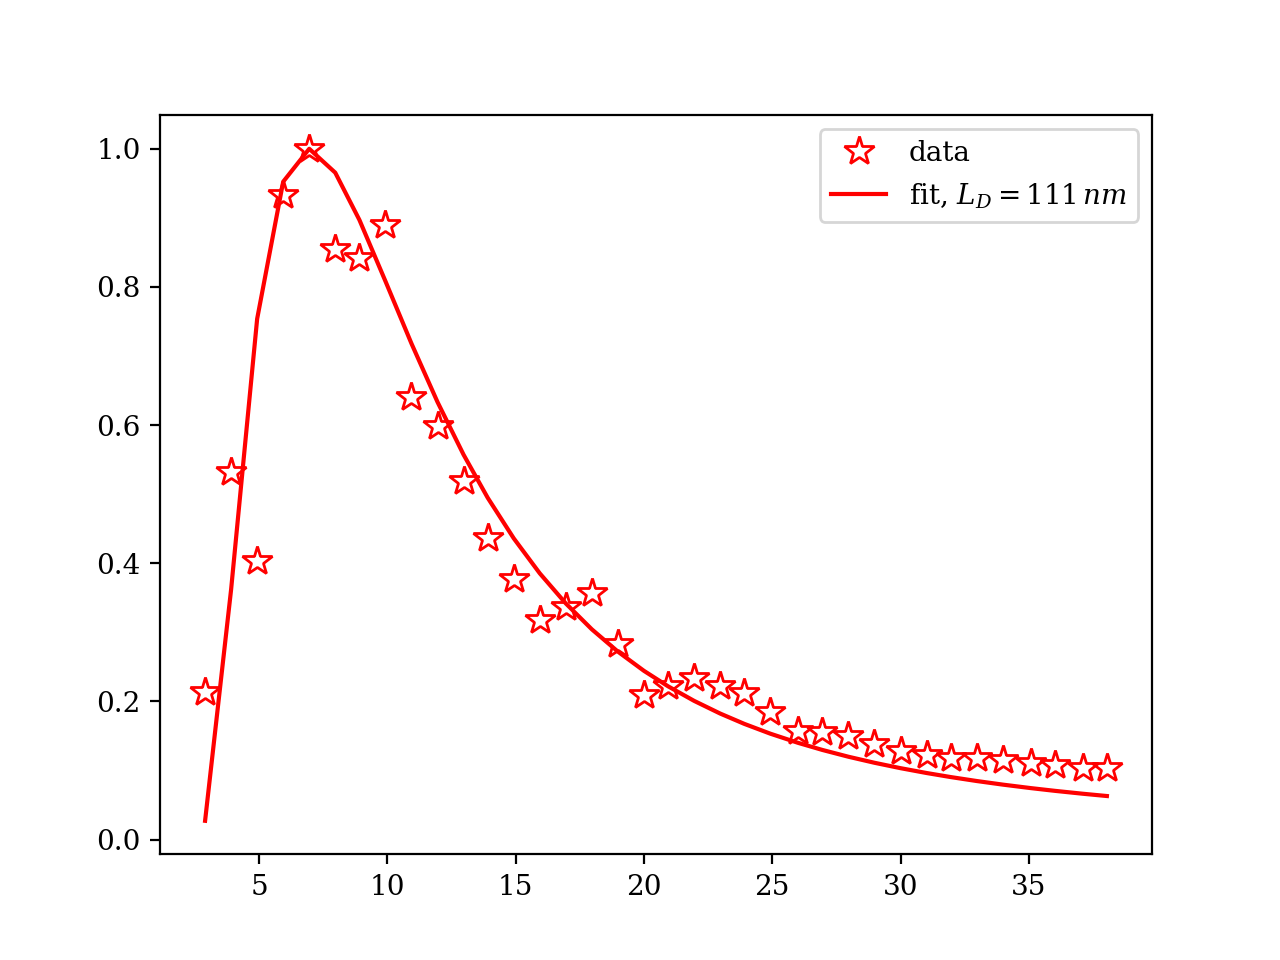

In [7]:
fig = plt.figure()
plt.plot(E, I_data, 'r*', label = r'data', ms = 11, mfc='none')
plt.plot(E, I_fit,  'r-', label = r'fit, $L_D = %.0f \,nm$'%params[2])
plt.legend()

### S3 data fitting

In [8]:
path = 'data/S3.csv'
E, I_data, I_fit, params = fit_data(path = path, tm = 80, W = 500)
data.append([E, I_data, I_fit, params, path])

optimal =  [ 174.88516749 2141.83320575  488.92438295]


<IPython.core.display.Javascript object>


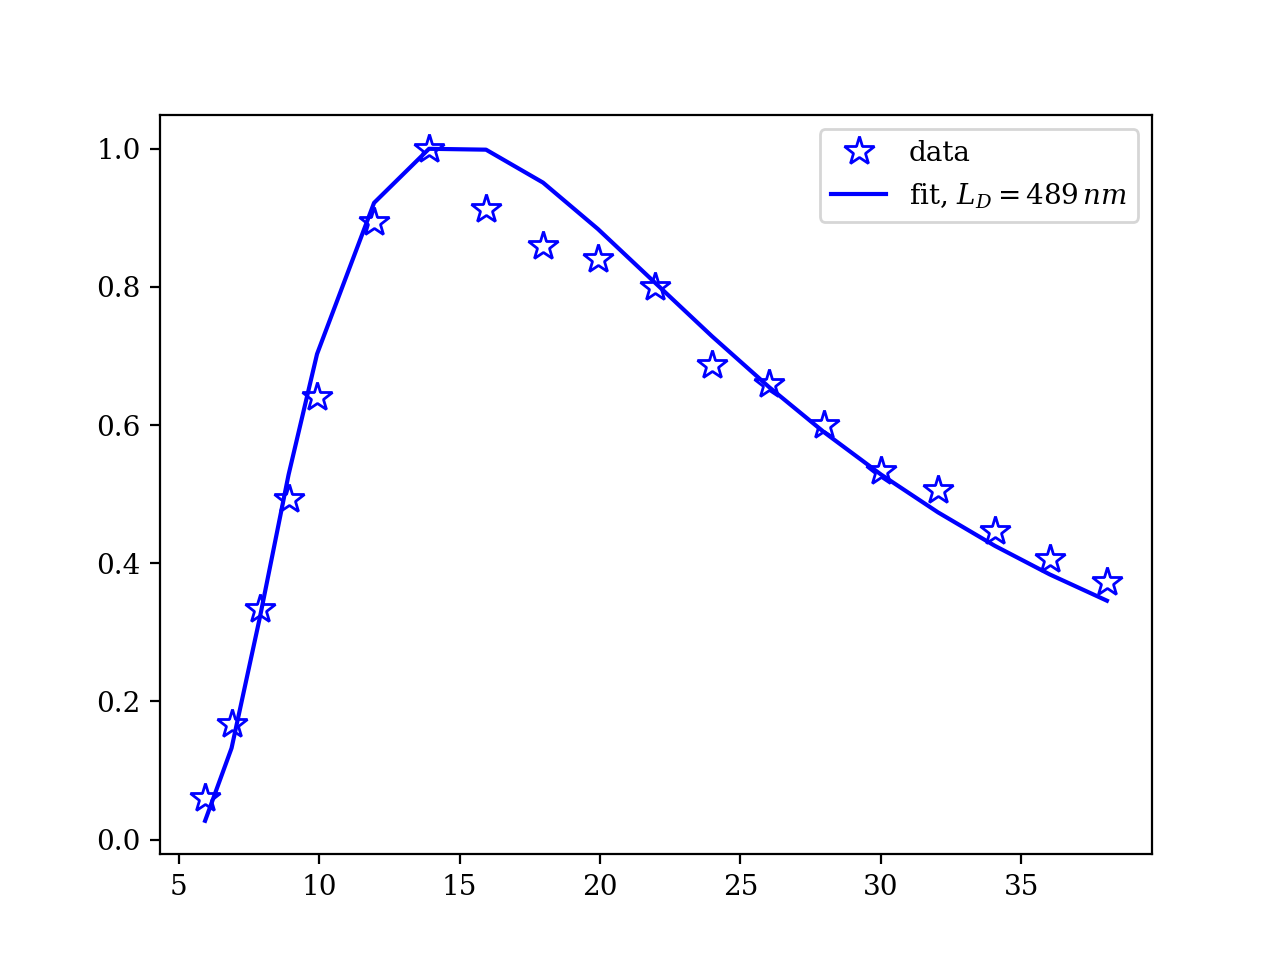

In [9]:
fig = plt.figure()
plt.plot(E, I_data, 'b*', label = r'data', ms = 11, mfc='none')
plt.plot(E, I_fit,  'b-', label = r'fit, $L_D = %.0f \,nm$'%params[2])
plt.legend()

### S2 data fitting

In [10]:
path = 'data/S2.csv'
E, I_data, I_fit, params = fit_data(path = path, tm = 40, W = 500)
data.append([E, I_data, I_fit, params, path])

optimal =  [  28.84869262 2581.08307891  114.56783736]


<IPython.core.display.Javascript object>


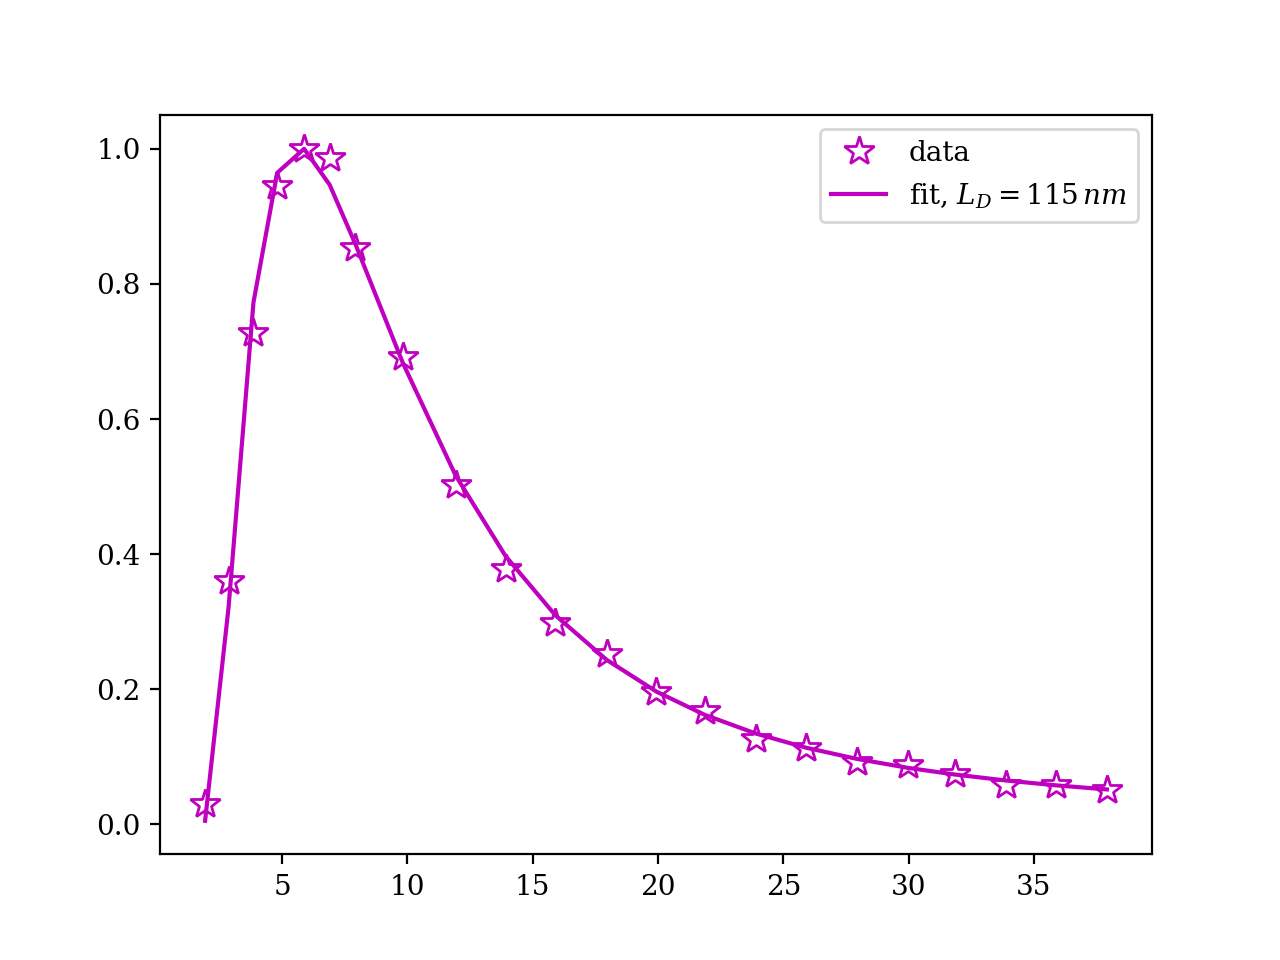

In [11]:
fig = plt.figure()
plt.plot(E, I_data, 'm*', label = r'data', ms = 11, mfc='none')
plt.plot(E, I_fit,  'm-', label = r'fit, $L_D = %.0f \,nm$'%params[2])
plt.legend()

### S4 data Fitting

In [12]:
path = 'data/S4.csv'
E, I_data, I_fit, params = fit_data(path = path, tm = 40, W = 500)
data.append([E, I_data, I_fit, params, path])

optimal =  [  15.94562431 1110.31999309  317.94021842]


<IPython.core.display.Javascript object>


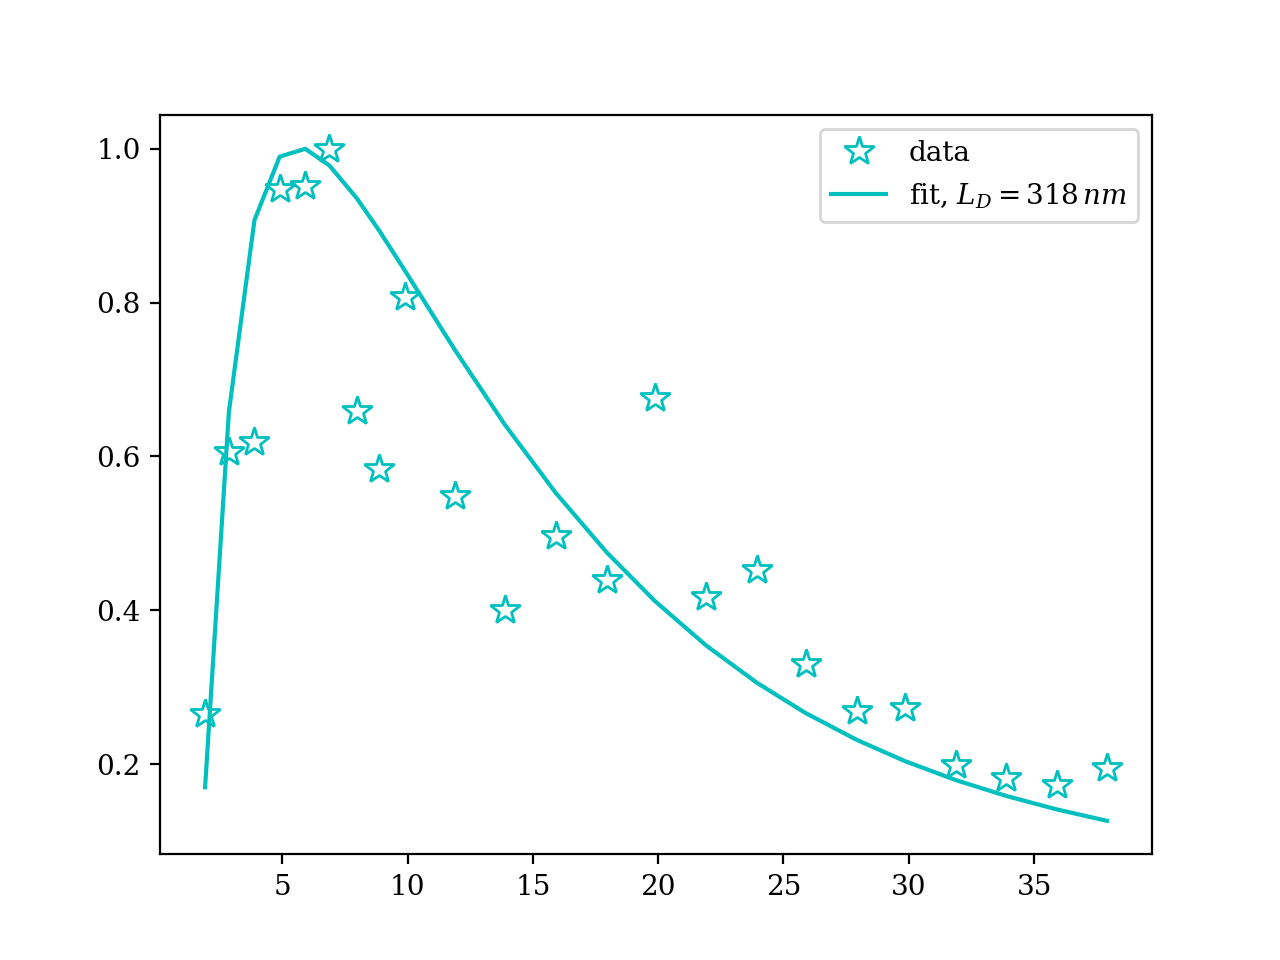

In [13]:
fig = plt.figure()
plt.plot(E, I_data, 'c*', label = r'data', ms = 11, mfc='none')
plt.plot(E, I_fit,  'c-', label = r'fit, $L_D = %.0f \,nm$'%params[2])
plt.legend()

### Total

<IPython.core.display.Javascript object>


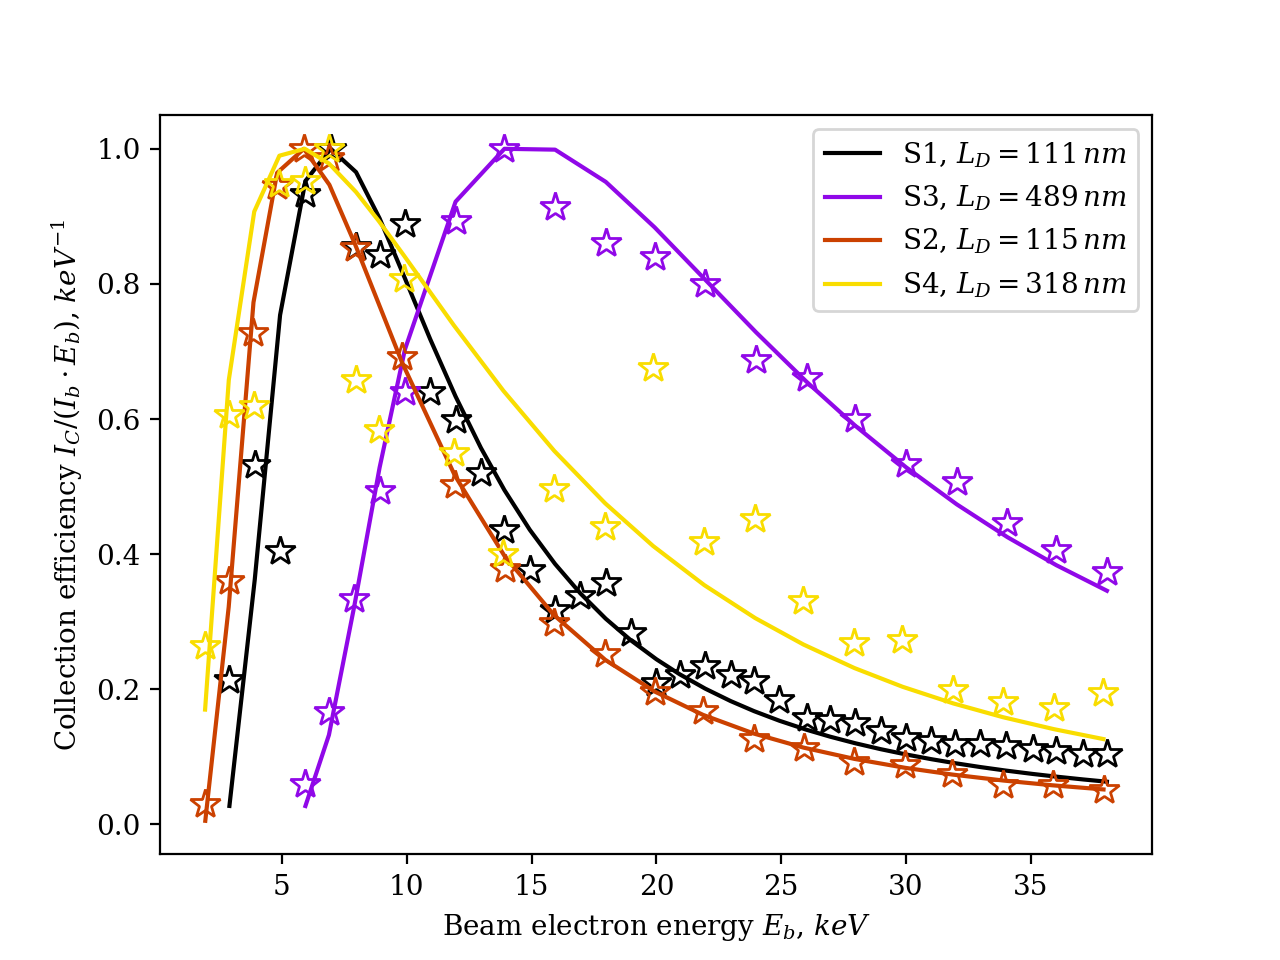

In [14]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel(r'Beam electron energy $E_b$, $keV$')
ax.set_ylabel(r'Collection efficiency $I_C/(I_b\cdot E_b)$, ${keV}^{-1}$')
c  = cm.gnuplot(np.linspace(0.0, 0.95, len(data)))
for i in range(len(data)):
    E, I_data, I_fit, params, path = data[i]
    ax.plot(E, I_data, '*', c = c[i], ms = 11, mfc='none')
    ax.plot(E, I_fit,  '-', c = c[i], label = path[-6:-4] + r', $L_D = %.0f \,nm$'%params[2])
    ax.legend()